## Result grouped by citeis (without LA city)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rental_data = pd.read_csv('../data/processed/cleaned_rental_data_with_postalcode.csv')
crime_data = pd.read_csv('../data/processed/crime_with_postalcode_cityname.csv')

city_avg_price = rental_data.groupby('city_name')['min_price'].mean().reset_index(name='city_avg_price')
# city_avg_price

In [11]:
# Aggregate crime data by city name and count the numbers of crime
crime_agg = crime_data.groupby('city_name').size().reset_index(name='crime_count')
crime_agg = crime_agg[crime_agg['crime_count'] > 0 ]
# crime_agg

In [12]:
# Ensure postal codes are strings to enable matching
city_avg_price['city_name'] = city_avg_price['city_name'].str.strip()
crime_agg['city_name'] = crime_agg['city_name'].str.strip()
# Merge the datasets on postal code
merged_data = pd.merge(city_avg_price, crime_agg, on='city_name', how='inner')
print(f"Total Data Rows: {len(merged_data)}")
merged_data

Total Data Rows: 23


,city_name,city_avg_price,crime_count
0,Bell Gardens,2280.909091,11
1,Beverly Hills,4029.120000,69
2,Burbank,3032.832335,35
3,Calabasas,4000.283333,1
4,Carson,3278.703704,73
5,Culver City,3589.593496,108
6,El Segundo,3450.428571,41
7,Gardena,2762.617647,174
8,Glendale,3194.336493,16
9,Hawthorne,2941.649123,5


In [ ]:
# remove "Los Angeles", since the crime_count is too large
merged_data = merged_data.drop(13)
#merged_data

,city_name,city_avg_price,crime_count
0,Bell Gardens,2280.909091,11
1,Beverly Hills,4029.120000,69
2,Burbank,3032.832335,35
3,Calabasas,4000.283333,1
4,Carson,3278.703704,73
5,Culver City,3589.593496,108
6,El Segundo,3450.428571,41
7,Gardena,2762.617647,174
8,Glendale,3194.336493,16
9,Hawthorne,2941.649123,5


Linear Regression R^2 Score: -0.08372830038341372
Random Forest Regression R^2 Score: -0.6084611994338949


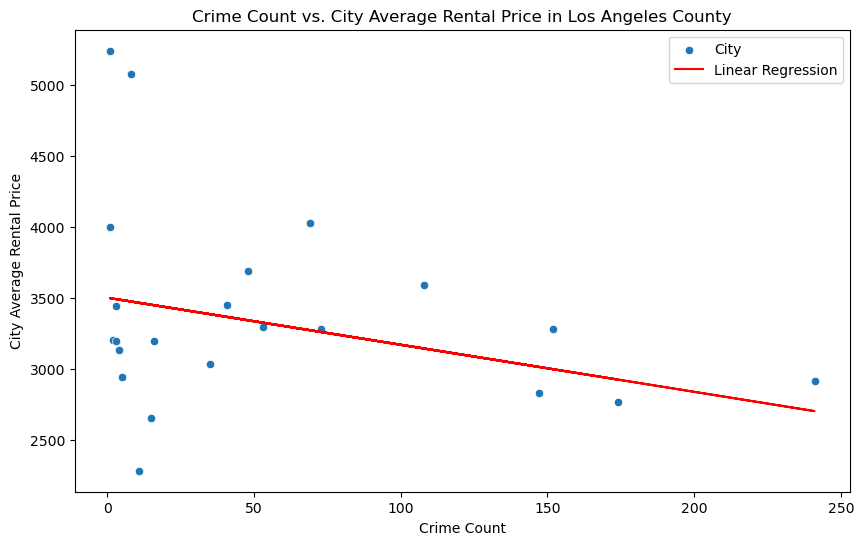

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
X = merged_data[['crime_count']]  # Feature: crime count
y = merged_data['city_avg_price']  # Target: average rental price

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Perform Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_score = lin_reg.score(X_test, y_test)

# Step 4: Perform Random Forest Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_score = rf_reg.score(X_test, y_test)

# Step 5: Print Results
print("Linear Regression R^2 Score:", lin_reg_score)
print("Random Forest Regression R^2 Score:", rf_reg_score)

# Step 6: Visualize Regression Results
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='crime_count', y='city_avg_price', data=merged_data, label='City')
plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression')
plt.title('Crime Count vs. City Average Rental Price in Los Angeles County')
plt.xlabel('Crime Count')
plt.ylabel('City Average Rental Price')
plt.legend()
plt.show()


## Result group by "postal_code" in "Los Angeles" city

In [182]:
la_data = rental_data[rental_data['city_name'] == 'Los Angeles']
la_price_grouped = la_data.groupby('postal_code')['min_price'].mean().reset_index(name='postal_avg_price')
# la_price_grouped

In [183]:
la_crime_data = crime_data[crime_data['city_name'] == 'Los Angeles']
la_crime_grouped = la_crime_data.groupby('postal_code').size().reset_index(name='crime_count')
# la_crime_grouped

In [184]:
avg_property_rating = la_data.groupby('postal_code')['Property Rating'].mean().reset_index()
avg_property_rating.rename(columns={'property_rating': 'avg_property_rating'}, inplace=True)
# avg_property_rating

In [185]:
ttl_review_count = la_data.groupby('postal_code')['Review Count'].sum().reset_index()
ttl_review_count.rename(columns={'review_count': 'avg_review_count'}, inplace=True)
# ttl_review_count

In [186]:
# Group by postal_code and calculate the average of total_security_amenities
avg_total_security = la_data.groupby('postal_code')['total_security_amenities'].mean().reset_index()
avg_total_security.rename(columns={'total_security_amenities': 'avg_total_security_amenities'}, inplace=True)
# avg_total_security

In [187]:
amenity_columns = la_data.loc[:, 'security':'patrol'].columns
amenity_count = la_data.groupby('postal_code')[amenity_columns].sum().reset_index()
# amenity_count

In [ ]:
crime_weights = {
    'violent_crime': 6, # These are the most severe crimes involving direct harm or risk to life. Examples include murder, arson, and kidnapping.
    'human_trafficking': 5, # Involves severe human rights violations, coercion, and exploitation, making it one of the gravest crimes after homicide.
    'sexual_offense': 5, # Includes rape and other sexual crimes with significant psychological and physical impacts.
    'assault': 4, # Physical violence or threats of violence that harm individuals.
    'theft': 3, # Crimes against property, including burglary, shoplifting, and vehicle theft.
    'fraud': 3, # Deceptive financial crimes with economic but not physical harm.
    'public_order': 2, # Includes offenses like vandalism, trespassing, and reckless driving that disrupt the community but are less severe.
    'animal_cruelty': 2, # Indicates unethical and harmful behavior, often linked to broader patterns of violence.
    'other': 1 # Catch-all category for minor crimes or uncategorized offenses with minimal societal or individual impact.
}
# Add a weighted score column based on the crime category
crime_data['crime_weight'] = crime_data['crime_category'].map(crime_weights)

# Calculate total weighted crime score per postal code
weighted_crime_score = crime_data.groupby('postal_code')['crime_weight'].sum().reset_index()
weighted_crime_score.rename(columns={'crime_weight': 'weighted_crime_score'}, inplace=True)
# weighted_crime_score

In [189]:
# One-hot encode the crime_category column
crime_category_encoded = pd.get_dummies(crime_data['crime_category'], prefix='crime')

# Aggregate one-hot encoded categories by postal code
crime_category_features = crime_data[['postal_code']].join(crime_category_encoded)
crime_category_aggregated = crime_category_features.groupby('postal_code').sum().reset_index()

In [190]:
la_merged = pd.merge(la_price_grouped, la_crime_grouped, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, avg_property_rating, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, ttl_review_count, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, avg_total_security, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, weighted_crime_score, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, amenity_count, on='postal_code', how='inner')
la_merged = pd.merge(la_merged, crime_category_aggregated, on='postal_code', how='inner')
# la_merged

### Results after removing outliers
#### Linear Regression for price and crime count

In [191]:
X = la_merged[['crime_count']] #  # Feature: crime count
y = la_merged['postal_avg_price']  # Target: average minimum rental price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

Outlier Indices: [57]
Removed Rows:
    crime_count
57           30
Removed Target Values:
57    6450.0
Name: postal_avg_price, dtype: float64
Number of rows after removing outliers: 58, 57


Linear Regression R^2 Score: 0.20108366081947004


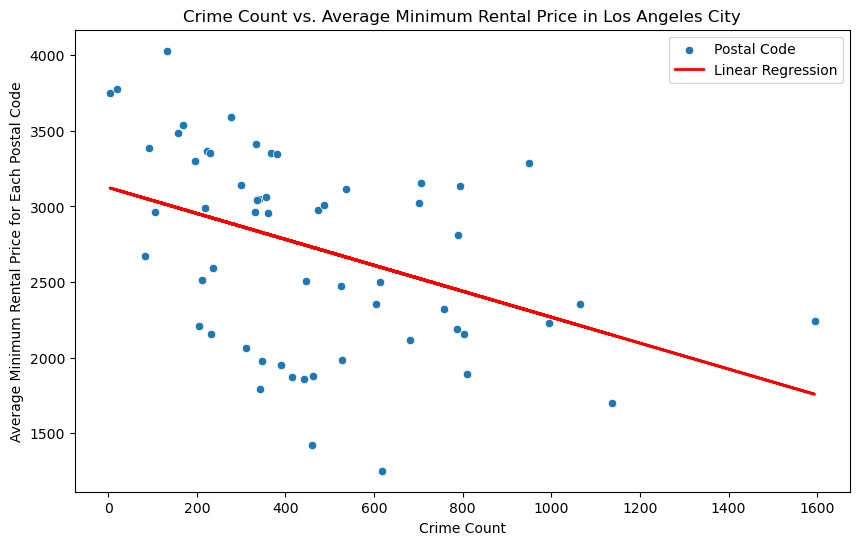

In [194]:
# Perform Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_score = lin_reg.score(X_test, y_test)

# Print model scores
print("Linear Regression R^2 Score:", lin_reg_score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='crime_count', y='postal_avg_price', data=filtered_data, label='Postal Code')
plt.plot(X['crime_count'], lin_reg.predict(X), color='red', label='Linear Regression', linewidth=2)
plt.title('Crime Count vs. Average Minimum Rental Price in Los Angeles City')
plt.xlabel('Crime Count')
plt.ylabel('Average Minimum Rental Price for Each Postal Code')
plt.legend()
plt.show()

#### Linear Regression for price and weighted crime score

In [195]:
X = la_merged[['weighted_crime_score']] #  # Feature: crime count
y = la_merged['postal_avg_price']  # Target: average minimum rental price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [196]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

Outlier Indices: [57]
Removed Rows:
    weighted_crime_score
57                    88
Removed Target Values:
57    6450.0
Name: postal_avg_price, dtype: float64
Number of rows after removing outliers: 58, 57


Linear Regression R^2 Score: 0.1967532146714598


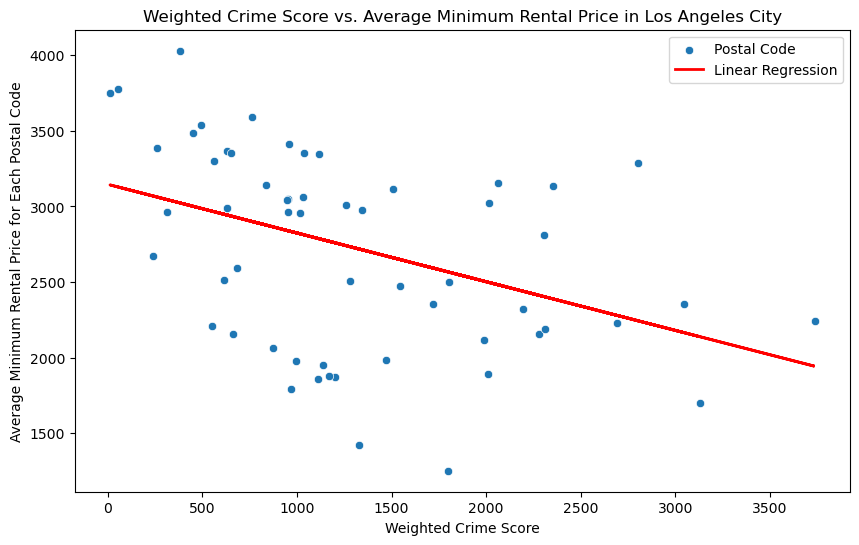

In [197]:
# Perform Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_score = lin_reg.score(X_test, y_test)

# Print model scores
print("Linear Regression R^2 Score:", lin_reg_score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weighted_crime_score', y='postal_avg_price', data=filtered_data, label='Postal Code')
plt.plot(X['weighted_crime_score'], lin_reg.predict(X), color='red', label='Linear Regression', linewidth=2)
plt.title('Weighted Crime Score vs. Average Minimum Rental Price in Los Angeles City')
plt.xlabel('Weighted Crime Score')
plt.ylabel('Average Minimum Rental Price for Each Postal Code')
plt.legend()
plt.show()

#### Random Forest Regression for multiple features

In [198]:
X = la_merged[['crime_count', 'Property Rating', 'Review Count', 'avg_total_security_amenities', 'weighted_crime_score'] + list(crime_category_encoded)] #+ amenity_columns.tolist()] # Feature: crime count
y = la_merged['postal_avg_price']  # Target: average minimum rental price
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [199]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)


Outlier Indices: [57]
Removed Rows:
    crime_count  Property Rating  Review Count  avg_total_security_amenities  \
57           30              0.0             0                           0.0   

    weighted_crime_score  crime_animal_cruelty  crime_assault  crime_fraud  \
57                    88                     0              2            0   

    crime_human_trafficking  crime_other  crime_public_order  \
57                        0            1                   2   

    crime_sexual_offense  crime_theft  crime_violent_crime  
57                     0           25                    0  
Removed Target Values:
57    6450.0
Name: postal_avg_price, dtype: float64
Number of rows after removing outliers: 58, 57


In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
# Perform Random Forest Regression
rf_reg = RandomForestRegressor(random_state=2)
rf_reg.fit(X_train, y_train)
rf_reg_predictions = rf_reg.predict(X_test)
# rf_reg_score = rf_reg.score(X_test, y_test)

rf_mae = mean_absolute_error(y_test, rf_reg_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_reg_predictions))
rf_mape = (abs(y_test - rf_reg_predictions) / y_test).mean() * 100
rf_r2 = r2_score(y_test, rf_reg_predictions)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"MAPE: {rf_mape}%")
print(f"R-squared: {rf_r2}")


Random Forest Regression Metrics:
MAE: 280.76764205988667
RMSE: 356.19179435371086
MAPE: 11.35370248447321%
R-squared: 0.72805646311686


                         Feature  Importance  Importance (%)
3   avg_total_security_amenities    0.283393       28.339287
6                  crime_assault    0.123664       12.366386
1                Property Rating    0.119533       11.953317
0                    crime_count    0.095219        9.521908
4           weighted_crime_score    0.088954        8.895450
13           crime_violent_crime    0.087480        8.748041
10            crime_public_order    0.058158        5.815759
12                   crime_theft    0.049973        4.997277
2                   Review Count    0.039096        3.909633
9                    crime_other    0.035110        3.511010
11          crime_sexual_offense    0.009410        0.941037
8        crime_human_trafficking    0.008708        0.870822
7                    crime_fraud    0.001301        0.130074
5           crime_animal_cruelty    0.000000        0.000000


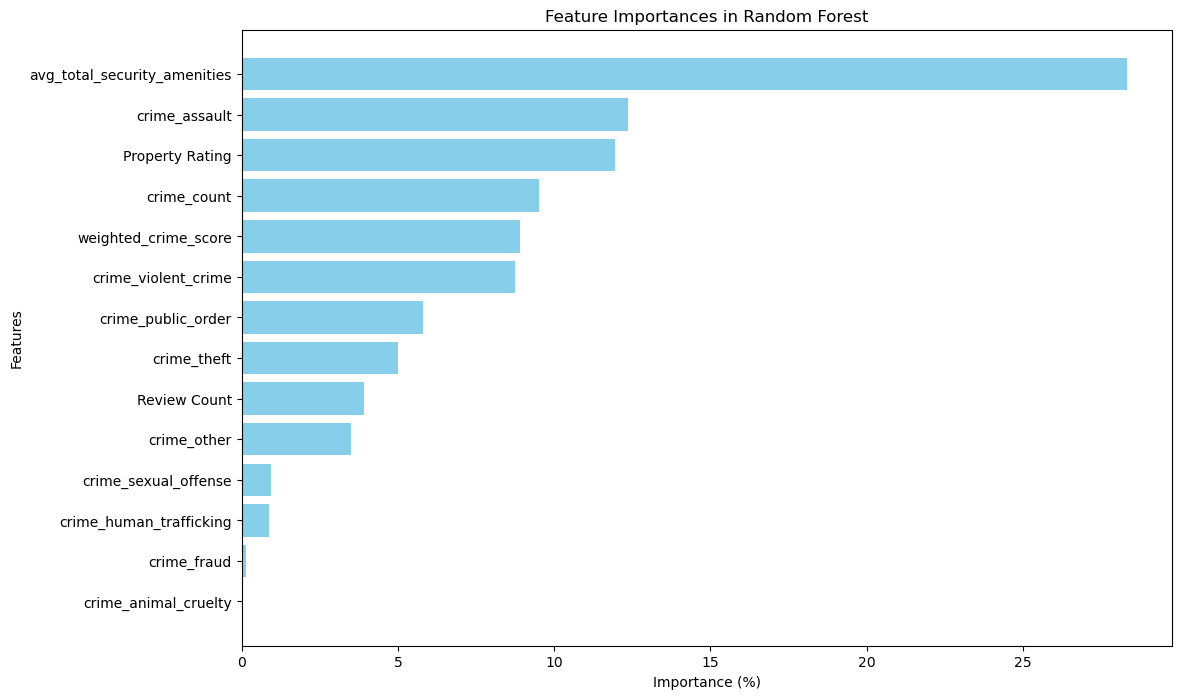

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# After training the Random Forest model
# Feature importances from the trained model
feature_importances = rf_reg.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Normalize to get percentages
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

#### Try to remove unimportant features

In [202]:
X = la_merged[['crime_count', 'Property Rating', 'avg_total_security_amenities', 'weighted_crime_score', 'crime_assault', 'crime_public_order', 'crime_violent_crime']] #+ amenity_columns.tolist()] # Feature: crime count
y = la_merged['postal_avg_price']  # Target: average minimum rental price
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
import numpy as np

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Identify the indices of outliers
outlier_indices = y[(y < lower_bound) | (y > upper_bound)].index

# Get the removed rows
removed_rows = X.loc[outlier_indices]
removed_targets = y.loc[outlier_indices]

# Print outlier information
print(f"Outlier Indices: {outlier_indices.tolist()}")
print(f"Removed Rows:\n{removed_rows}")
print(f"Removed Target Values:\n{removed_targets}")

# Optionally save the removed rows to a file for future reference
removed_data = pd.concat([removed_rows, removed_targets], axis=1)
removed_data.to_csv("removed_outliers.csv", index=True)

# Remove rows where y contains outliers
non_outliers = (y >= lower_bound) & (y <= upper_bound)
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]
filtered_data = pd.concat([X_no_outliers, y_no_outliers], axis=1)
print(f"Number of rows after removing outliers: {len(y)}, {len(y_no_outliers)}")

# Split the data again after outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

Outlier Indices: [57]
Removed Rows:
    crime_count  Property Rating  avg_total_security_amenities  \
57           30              0.0                           0.0   

    weighted_crime_score  crime_assault  crime_public_order  \
57                    88              2                   2   

    crime_violent_crime  
57                    0  
Removed Target Values:
57    6450.0
Name: postal_avg_price, dtype: float64
Number of rows after removing outliers: 58, 57


### Random Forest Tree again

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
# Perform Random Forest Regression
rf_reg = RandomForestRegressor(random_state=2)
rf_reg.fit(X_train, y_train)
rf_reg_predictions = rf_reg.predict(X_test)
# rf_reg_score = rf_reg.score(X_test, y_test)

rf_mae = mean_absolute_error(y_test, rf_reg_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_reg_predictions))
rf_mape = (abs(y_test - rf_reg_predictions) / y_test).mean() * 100
rf_r2 = r2_score(y_test, rf_reg_predictions)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"MAPE: {rf_mape}%")
print(f"R-squared: {rf_r2}")


Random Forest Regression Metrics:
MAE: 261.71687233554815
RMSE: 342.1151215172896
MAPE: 10.48650933001693%
R-squared: 0.7491261111719976


### XGBoost

In [205]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dataset and train-test split (already defined)
# X = la_merged[['crime_count', 'Property Rating', 'Review Count', 'avg_total_security_amenities', 'weighted_crime_score'] + list(crime_category_encoded)]
# y = la_merged['postal_avg_price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mape = (abs(y_test - xgb_predictions) / y_test).mean() * 100
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Metrics:")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"MAPE: {xgb_mape}%")
print(f"R-squared: {xgb_r2}")

# Fine-tune the XGBoost model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and performance
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the tuned model
best_xgb_model = grid_search.best_estimator_
best_xgb_predictions = best_xgb_model.predict(X_test)

best_xgb_mae = mean_absolute_error(y_test, best_xgb_predictions)
best_xgb_rmse = sqrt(mean_squared_error(y_test, best_xgb_predictions))
best_xgb_mape = (abs(y_test - best_xgb_predictions) / y_test).mean() * 100
best_xgb_r2 = r2_score(y_test, best_xgb_predictions)

print("\nTuned XGBoost Metrics:")
print(f"MAE: {best_xgb_mae}")
print(f"RMSE: {best_xgb_rmse}")
print(f"MAPE: {best_xgb_mape}%")
print(f"R-squared: {best_xgb_r2}")


XGBoost Metrics:
MAE: 274.399308167514
RMSE: 361.0100626428095
MAPE: 11.202312164499379%
R-squared: 0.7206494467388888
Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] 

### LightGBM

In [206]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from math import sqrt

# # Dataset and train-test split (already defined)
# # X = la_merged[['crime_count', 'Property Rating', 'Review Count', 'avg_total_security_amenities', 'weighted_crime_score'] + list(crime_category_encoded)]
# # y = la_merged['postal_avg_price']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train the LightGBM model
# lgb_model = lgb.LGBMRegressor(random_state=42)
# lgb_model.fit(X_train, y_train)

# # Make predictions
# lgb_predictions = lgb_model.predict(X_test)

# # Evaluate the model
# lgb_mae = mean_absolute_error(y_test, lgb_predictions)
# lgb_rmse = sqrt(mean_squared_error(y_test, lgb_predictions))
# lgb_mape = (abs(y_test - lgb_predictions) / y_test).mean() * 100
# lgb_r2 = r2_score(y_test, lgb_predictions)

# print("\nLightGBM Metrics:")
# print(f"MAE: {lgb_mae}")
# print(f"RMSE: {lgb_rmse}")
# print(f"MAPE: {lgb_mape}%")
# print(f"R-squared: {lgb_r2}")

# # Fine-tune the LightGBM model
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 5, 7, -1],  # -1 for no limit
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],  # Row sampling
#     'colsample_bytree': [0.8, 1.0],  # Feature sampling
#     'num_leaves': [20, 31, 50],  # Max leaves in each tree
# }

# grid_search = GridSearchCV(
#     estimator=lgb.LGBMRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# # Best parameters and performance
# print("\nBest Parameters from GridSearchCV:")
# print(grid_search.best_params_)

# # Evaluate the tuned model
# best_lgb_model = grid_search.best_estimator_
# best_lgb_predictions = best_lgb_model.predict(X_test)

# best_lgb_mae = mean_absolute_error(y_test, best_lgb_predictions)
# best_lgb_rmse = sqrt(mean_squared_error(y_test, best_lgb_predictions))
# best_lgb_mape = (abs(y_test - best_lgb_predictions) / y_test).mean() * 100
# best_lgb_r2 = r2_score(y_test, best_lgb_predictions)

# print("\nTuned LightGBM Metrics:")
# print(f"MAE: {best_lgb_mae}")
# print(f"RMSE: {best_lgb_rmse}")
# print(f"MAPE: {best_lgb_mape}%")
# print(f"R-squared: {best_lgb_r2}")

### CatBoost

In [207]:
import catboost as cb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dataset and train-test split (already defined)
# X = la_merged[['crime_count', 'Property Rating', 'Review Count', 'avg_total_security_amenities', 'weighted_crime_score'] + list(crime_category_encoded)]
# y = la_merged['postal_avg_price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the CatBoost model
cat_model = cb.CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Make predictions
cat_predictions = cat_model.predict(X_test)

# Evaluate the model
cat_mae = mean_absolute_error(y_test, cat_predictions)
cat_rmse = sqrt(mean_squared_error(y_test, cat_predictions))
cat_mape = (abs(y_test - cat_predictions) / y_test).mean() * 100
cat_r2 = r2_score(y_test, cat_predictions)

print("\nCatBoost Metrics:")
print(f"MAE: {cat_mae}")
print(f"RMSE: {cat_rmse}")
print(f"MAPE: {cat_mape}%")
print(f"R-squared: {cat_r2}")

# Fine-tune the CatBoost model
param_grid = {
    'iterations': [100, 200, 300, 400],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=cb.CatBoostRegressor(verbose=0, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and performance
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the tuned model
best_cat_model = grid_search.best_estimator_
best_cat_predictions = best_cat_model.predict(X_test)

best_cat_mae = mean_absolute_error(y_test, best_cat_predictions)
best_cat_rmse = sqrt(mean_squared_error(y_test, best_cat_predictions))
best_cat_mape = (abs(y_test - best_cat_predictions) / y_test).mean() * 100
best_cat_r2 = r2_score(y_test, best_cat_predictions)

print("\nTuned CatBoost Metrics:")
print(f"MAE: {best_cat_mae}")
print(f"RMSE: {best_cat_rmse}")
print(f"MAPE: {best_cat_mape}%")
print(f"R-squared: {best_cat_r2}")


CatBoost Metrics:
MAE: 314.982082285155
RMSE: 384.6368631849791
MAPE: 12.976310948759256%
R-squared: 0.6828879615014043
Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05, subsample=0.8; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=1.0; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05, subsample=0.8; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=1.0; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=1.0; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01, subsample=0.8; total time

/Users/maggiefu/anaconda3/envs/510project/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
